In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df=pd.read_csv("cleaned_amazon_data.csv")

In [2]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating,payment_method_simplified
0,TXN_2023_00063013,2023-07-23,CUST_2023_00018393,PROD_000454,Vivo Y95 64GB Black,Electronics,Smartphones,Vivo,27340.84,21.57,21442.59,1,21442.59,0.0,21442.59,Kolkata,West Bengal,Metro,Standard,Group-3,Cash,3,Standard,False,False,4.0,Delivered,7,2023,3,0.20,True,3.5,Cash
1,TXN_2021_00064486,NaN,CUST_2015_00002865,PROD_000579,Realme Realme 3 128GB Black,Electronics,Smartphones,Realme,32907.49,0.00,32907.49,3,98722.47,0.0,98722.47,Ludhiana,Punjab,Tier2,Standard,Unknown,UPI,3,Standard,False,False,5.0,Delivered,7,2021,3,0.21,False,4.5,UPI
2,TXN_2017_00065617,2017-11-16,CUST_2016_00004057,PROD_000295,Vivo V7 32GB Blue,Electronics,Smartphones,Vivo,47052.18,21.91,36741.38,1,36741.38,0.0,36741.38,Bengaluru,Karnataka,Metro,Premium,Group-3,Card,6,Standard,False,False,5.0,Delivered,11,2017,4,0.24,True,4.3,Card
3,TXN_2018_00071646,2018-10-09,CUST_2018_00006275,PROD_000095,Motorola Moto X Play 16GB White,Electronics,Smartphones,Motorola,25970.76,0.00,25970.76,1,25970.76,0.0,25970.76,Kochi,Kerala,Tier2,Standard,Group-1,Cash,4,Standard,False,False,4.0,Delivered,10,2018,4,0.16,False,3.7,Cash
4,TXN_2016_00020663,2016-06-22,CUST_2016_00006056,PROD_001729,Xiaomi Slate 8GB RAM Silver,Electronics,Tablets,Xiaomi,21541.01,59.78,8663.17,1,8663.17,0.0,8663.17,Mumbai,Maharashtra,Metro,Standard,Group-2,Cash,4,Standard,False,True,3.5,Delivered,6,2016,2,0.33,True,4.5,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081895,TXN_2018_00047331,2018-07-06,CUST_2017_00025689,PROD_000009,Apple iPhone 6 Plus 16GB Black,Electronics,Smartphones,Apple,134278.16,30.83,92886.49,1,92886.49,0.0,92886.49,Jaipur,Rajasthan,Tier1,Standard,Group-2,Card,4,Standard,False,True,5.0,Delivered,7,2018,3,0.17,True,3.6,Card
1081896,TXN_2022_00065321,2022-07-23,CUST_2021_00026763,PROD_001732,OnePlus iPad 8GB RAM Silver,Electronics,Tablets,OnePlus,97578.76,0.00,97578.76,1,97578.76,0.0,97578.76,Delhi,Delhi,Metro,Premium,Group-3,UPI,1,Same Day,True,False,4.5,Delivered,7,2022,3,0.58,True,4.6,UPI
1081897,TXN_2023_00057908,NaN,CUST_2023_00031035,PROD_001572,ASUS Inspiron 8GB RAM Black,Electronics,Laptops,ASUS,105284.29,43.31,59683.64,1,59683.64,0.0,59683.64,Bhubaneswar,Odisha,Tier2,Standard,Group-2,Card,1,Same Day,True,True,4.0,Delivered,7,2023,3,1.37,True,4.2,Card
1081898,TXN_2020_00035169,2020-04-12,CUST_2017_00005760,PROD_001582,ASUS Gaming 8GB RAM Silver,Electronics,Laptops,ASUS,72687.00,0.00,72686.89,1,72686.89,0.0,72686.89,Mumbai,Maharashtra,Metro,Budget,Group-2,Cash,4,Standard,False,False,5.0,Delivered,4,2020,2,2.02,False,3.8,Cash


In [3]:
df.isnull().sum()

,0
transaction_id,0
order_date,103735
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [4]:
df['delivery_days'].mode()

,delivery_days
0,3


In [5]:
df['delivery_days']=df['delivery_days'].fillna(df['delivery_days'].mode()[0])

In [6]:
df.isnull().sum()

,0
transaction_id,0
order_date,103735
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [7]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

In [8]:
all_year=df['order_year'].unique()
all_year

array([2023, 2021, 2017, 2018, 2016, 2019, 2020, 2022, 2015, 2025, 2024])

#Question 1
Create a comprehensive revenue trend analysis showing yearly revenue growth from 2015-2025. Include percentage growth rates, trend lines, and highlight key growth periods with annotations.


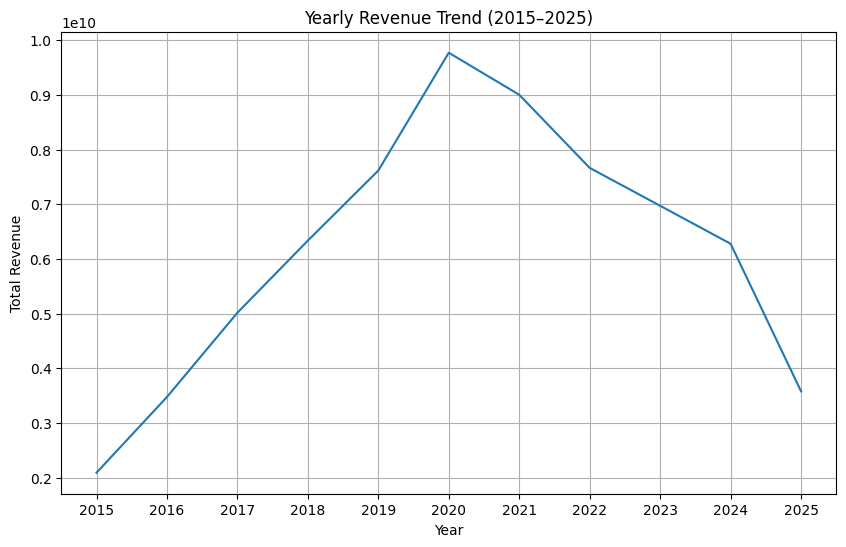

In [9]:
yearly_revenue=df.groupby('order_year')['final_amount_inr'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, markers='o')
plt.xticks(yearly_revenue.index)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Revenue Trend (2015–2025)')
plt.grid(True)
plt.show()

# percentage=yearly_revenue.pct_change()*100
# percentage

#Question 2
Analyze seasonal patterns in sales data. Create monthly sales heatmaps and identify peak selling months. Compare seasonal trends across different years and categories.


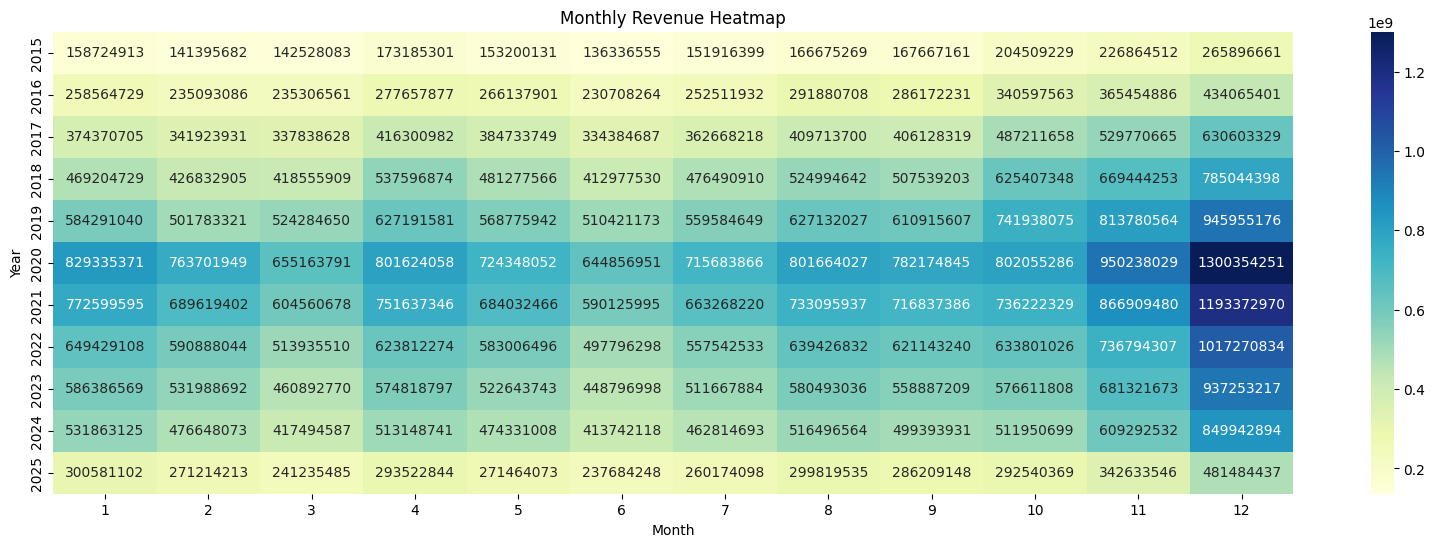

In [10]:
monthly_revenue=df.groupby(['order_year','order_month'])['final_amount_inr'].sum().unstack()

plt.figure(figsize=(20,6))
sns.heatmap(monthly_revenue, cmap='YlGnBu',annot=True, fmt='.0f')

plt.title('Monthly Revenue Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

#Question 3
Build a customer segmentation analysis using RFM (Recency, Frequency, Monetary) methodology. Create scatter plots and segment customers into meaningful groups with actionable insights.


In [11]:
df['order_date']= pd.to_datetime(df['order_date'], errors='coerce')

In [12]:
df['order_date'].isnull().sum()

np.int64(103735)

In [13]:
# ref_date=df['order_date'].max()+pd.Timedelta(day=1)

# rfm=df.groupby('cutomer_id').agg({
#     'order_date':lambda x:(ref_date-x.max()).days,
#     'order_id':'count',
#     'final_amount_inr':'sum'
# }).rename(columns={'order_date':'Recency','order_id':'Frequency','final_amount_inr':'Monetary'})

# rfm.columns=['recency','frequency','monetary']
# plt.figure(figsize=(10,6))
# sns.scatterplot(data=rfm, x="Frequency", y="Monetary", hue=pd.qcut(rfm['Recency'],4))
# plt.title("RFM Segmentation")

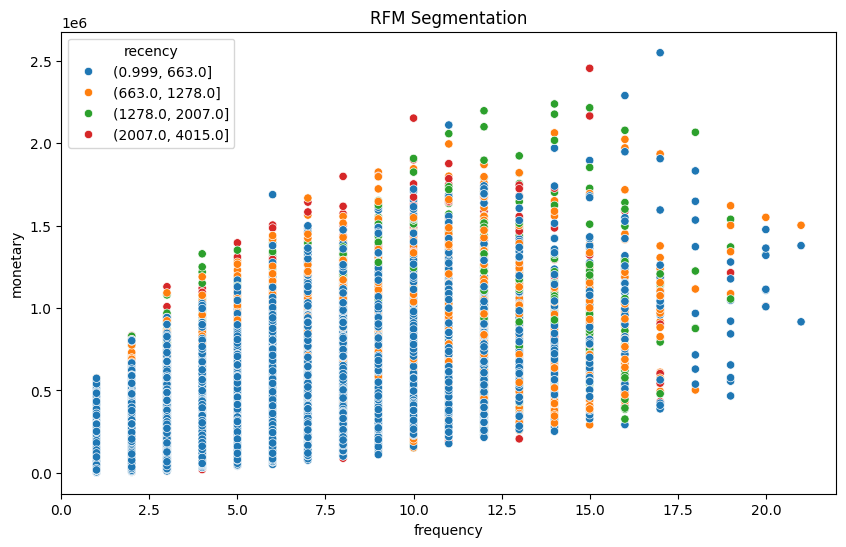

In [14]:
df_rfm = df.dropna(subset=['order_date']).copy()

ref_date=df_rfm['order_date'].max()+pd.Timedelta(days=1)

rfm=df_rfm.groupby('customer_id').agg({
    'order_date':lambda x:(ref_date-x.max()).days,
    'transaction_id':'count',
    'final_amount_inr':'sum'
}).rename(columns={'order_date':'Recency','transaction_id':'Frequency','final_amount_inr':'Monetary'})

rfm.columns=['recency','frequency','monetary']
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x="frequency", y="monetary", hue=pd.qcut(rfm['recency'],4))
plt.title("RFM Segmentation")
plt.show()

#Question 4
Visualize the evolution of payment methods from 2015-2025. Show the rise of UPI, decline of COD, and create stacked area charts to demonstrate market share changes over time.


Text(0, 0.5, 'Revenue (INR)')

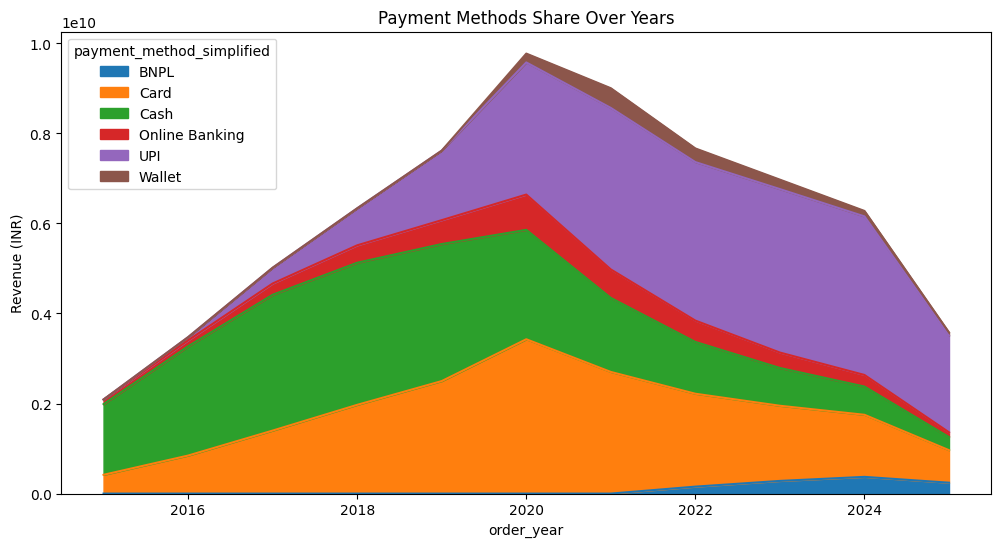

In [15]:
payment_tr=df.groupby(['order_year','payment_method_simplified'])['final_amount_inr'].sum().reset_index()
payment_tr=payment_tr.pivot(index='order_year', columns='payment_method_simplified',values='final_amount_inr')

payment_tr.plot(kind='area', stacked=True, figsize=(12,6))

plt.title("Payment Methods Share Over Years")
plt.ylabel("Revenue (INR)")

#Question 5
Perform category-wise performance analysis. Create treemaps, bar charts, and pie charts showing revenue contribution, growth rates, and market share for each product category.


Text(0.5, 1.0, 'Category Revenue Contribution')

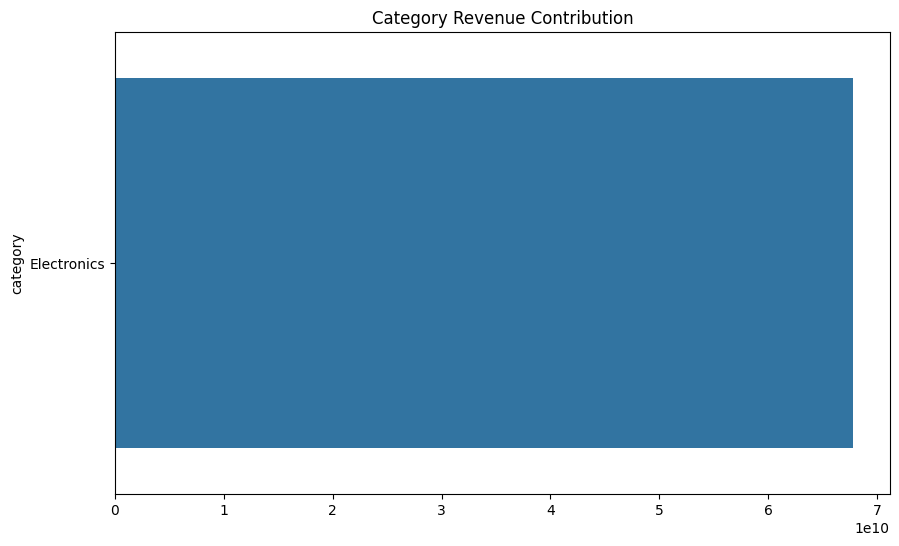

In [16]:
category_type=df.groupby('category')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_type.values, y=category_type.index)
plt.title("Category Revenue Contribution")

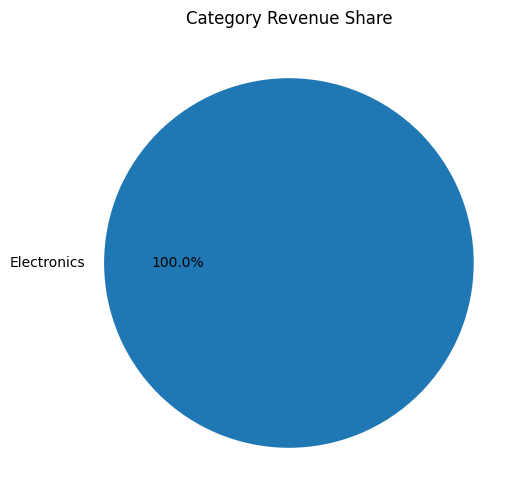

In [17]:
plt.figure(figsize=(10,6))
plt.pie(category_type.values,labels=category_type.index,autopct='%1.1f%%')
plt.title("Category Revenue Share")
plt.show()

#Question 6
Analyze Prime membership impact on customer behavior. Compare average order values, order frequency, and category preferences between Prime and non-Prime customers using multiple visualization types.


Text(0.5, 1.0, 'Prime vs Non-Prime Order Values')

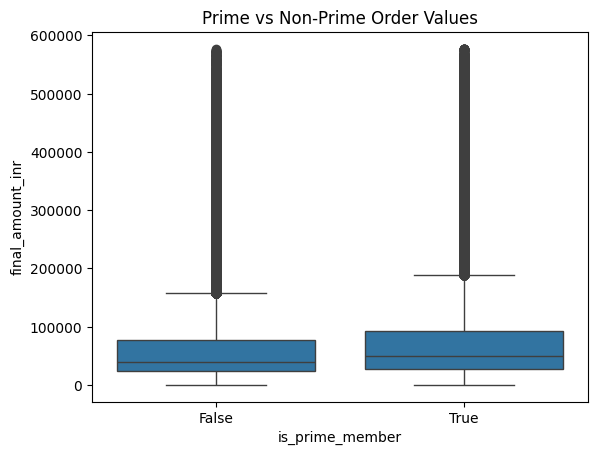

In [18]:
prime_analyze=df.groupby('is_prime_member')['final_amount_inr'].agg(['mean','sum','count'])
sns.boxplot(x='is_prime_member',y='final_amount_inr',data=df)

plt.title("Prime vs Non-Prime Order Values")

#Question 7
Create geographic analysis of sales performance across Indian cities and states. Build choropleth maps and bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural).


In [19]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

In [20]:
df['customer_tier'].sample(5)

,customer_tier
243049,Metro
797233,Metro
456391,Metro
196712,Metro
155894,Metro


Text(0.5, 1.0, 'Top 15 States by Revenue')

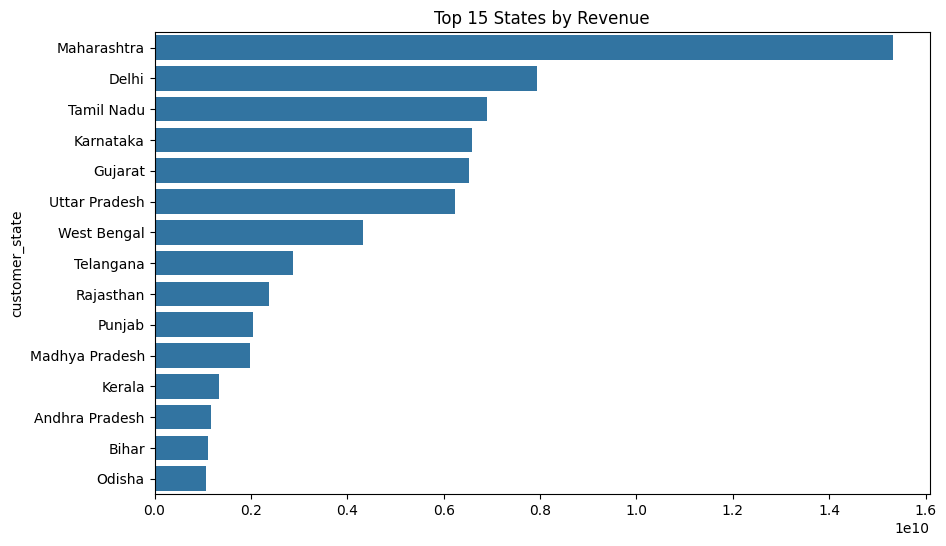

In [21]:
state_rev = df.groupby('customer_state')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=state_rev.values, y=state_rev.index)
plt.title("Top 15 States by Revenue")


Text(0.5, 1.0, 'Top city by Revenue')

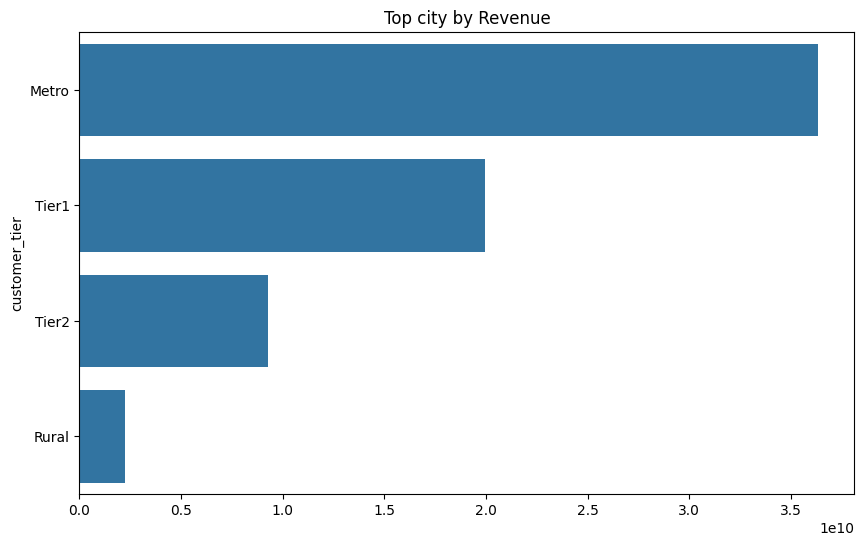

In [22]:
state_rev = df.groupby('customer_tier')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=state_rev.values, y=state_rev.index)
plt.title("Top city by Revenue")



#Question 8
Study festival sales impact using before/during/after analysis. Visualize revenue spikes during Diwali, Prime Day, and other festivals with detailed time series analysis.


In [23]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

Text(0, 0.5, 'Total Revenue')

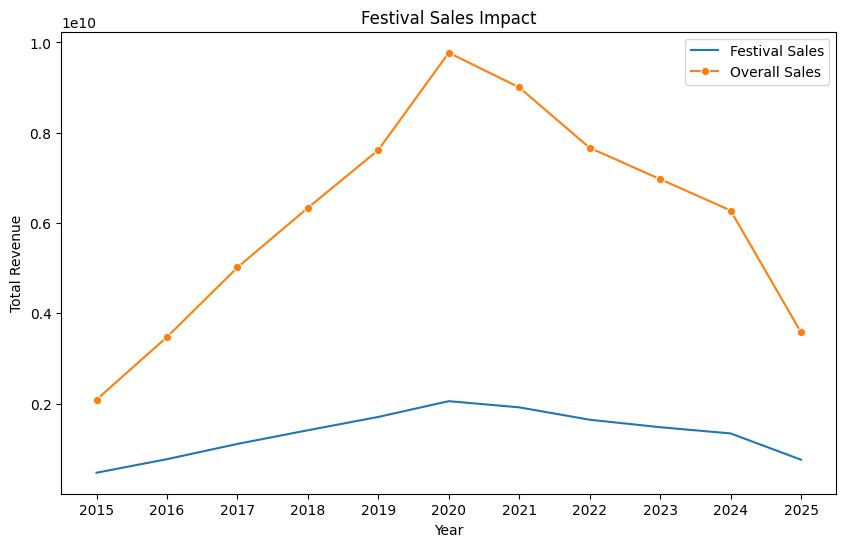

In [24]:
festivals=df[df['is_festival_sale']==1].groupby('order_year')['final_amount_inr'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=festivals.index, y=festivals.values, markers=True,label="Festival Sales")
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o", label="Overall Sales")
plt.title("Festival Sales Impact")
plt.xticks(festivals.index)
plt.xlabel('Year')
plt.ylabel('Total Revenue')

#Question 9
Analyze customer age group behavior and preferences. Create demographic analysis with category preferences, spending patterns, and shopping frequency across different age segments.


In [25]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

In [26]:
df['customer_age_group'].unique()

array(['Group-3', 'Unknown', 'Group-1', 'Group-2', 'Group-4', 'Group-5'],
      dtype=object)

1. '18-25': 'Group-1',
2. '26-35': 'Group-2',
3. '36-45': 'Group-3',
4. '46-55': 'Group-4',
5. '55+':   'Group-5'

Text(0.5, 1.0, 'Age Group Revenue Contribution')

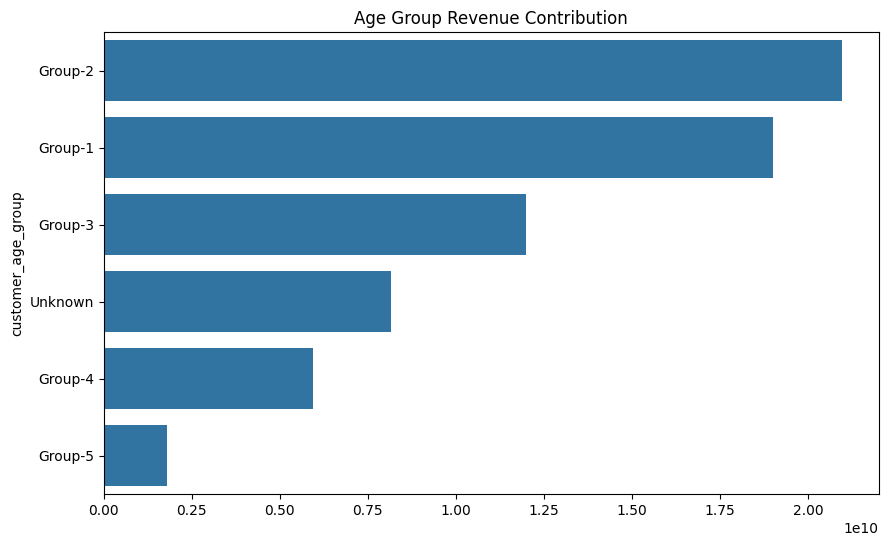

In [27]:
age_group=df.groupby('customer_age_group')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=age_group.values, y=age_group.index)
plt.title("Age Group Revenue Contribution")

#Question 10
Build price vs demand analysis using scatter plots and correlation matrices. Analyze how pricing strategies affect sales volumes across different categories and customer segments.


In [28]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

Text(0, 0.5, 'Quantity Sold')

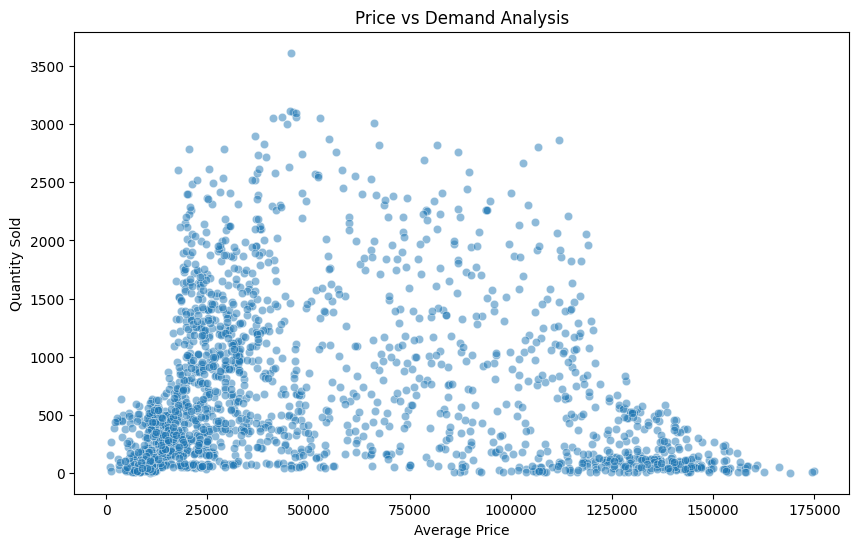

In [29]:
supply_demand=df.groupby('product_id').agg({
    'discounted_price_inr':'mean',
    'quantity':'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=supply_demand,x= 'discounted_price_inr',y='quantity',alpha=0.5)
plt.title("Price vs Demand Analysis")
plt.xlabel("Average Price")
plt.ylabel("Quantity Sold")

#Question 11
Create delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.


In [30]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Delivery Days')

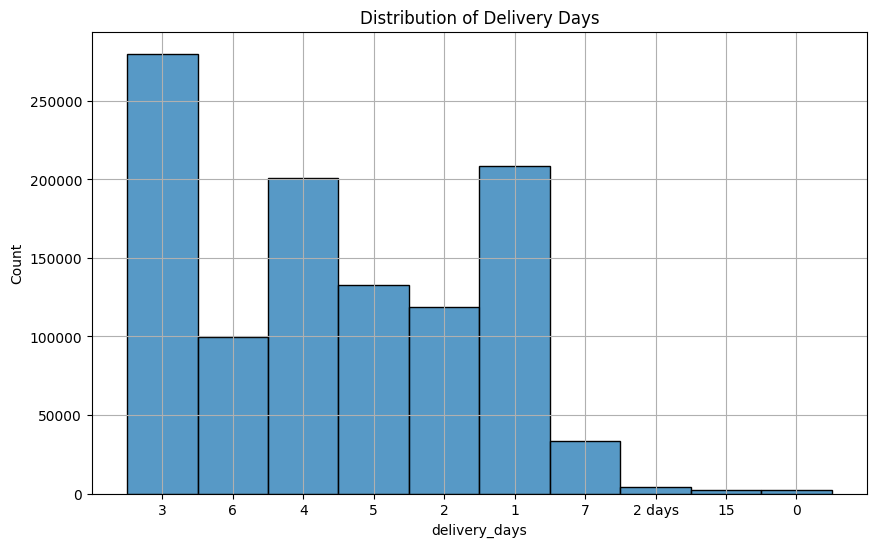

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['delivery_days'], bins=20)
plt.grid()
plt.title("Distribution of Delivery Days")

#Question 12
Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories through multiple visualization techniques.


In [32]:
df['return_status'].unique()

array(['Delivered', 'Cancelled', 'Returned'], dtype=object)

#Question 13
Study brand performance and market share evolution. Create brand comparison charts, market share trends, and competitive positioning analysis across different categories.


In [33]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

Text(0.5, 1.0, 'Brand Revenue Contribution')

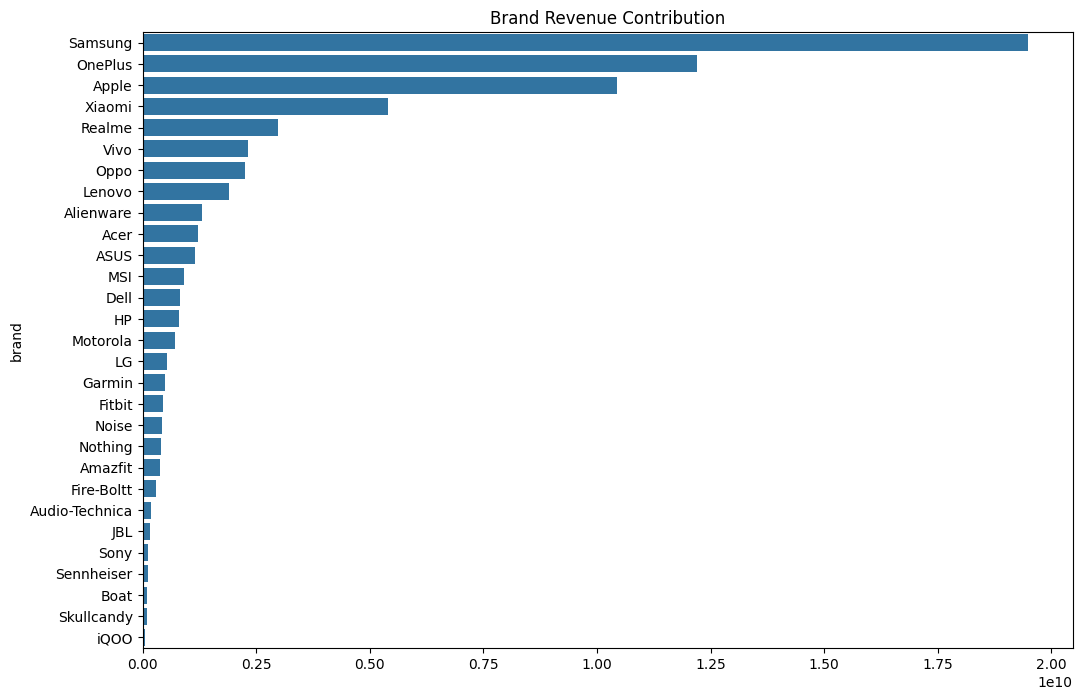

In [34]:
brand_performance=df.groupby('brand')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=brand_performance.values, y=brand_performance.index)
plt.title("Brand Revenue Contribution")

#Question 14
Build customer lifetime value (CLV) analysis using cohort analysis, retention curves, and CLV distribution across different customer segments and acquisition years.


#Question 15
Analyze discount and promotional effectiveness. Create discount impact analysis showing correlation between discount percentages, sales volumes, and revenue across categories and time periods.


Text(0.5, 1.0, 'Discount Percent ')

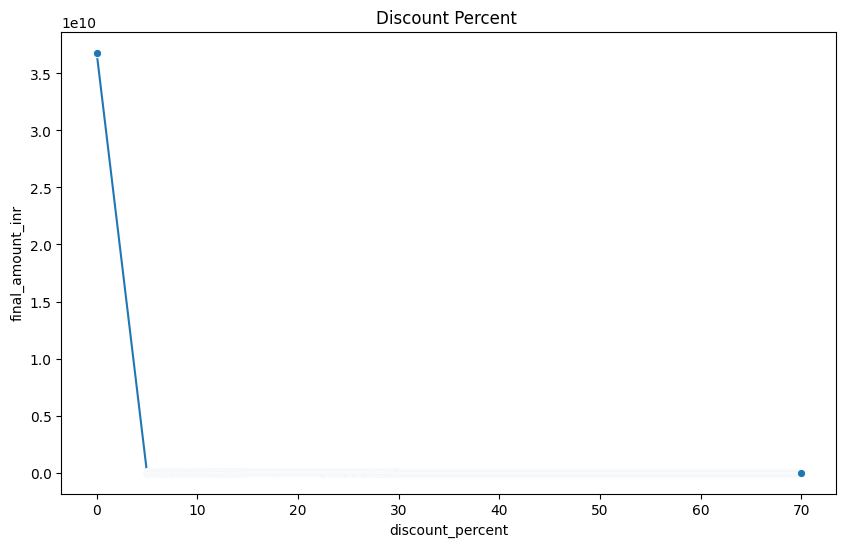

In [35]:
discount_per=df.groupby('discount_percent')['final_amount_inr'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=discount_per, x='discount_percent', y='final_amount_inr', marker='o')
plt.title('Discount Percent ')

#Question 16
Study product rating patterns and their impact on sales. Analyze rating distributions, correlation with sales performance, and identify patterns across categories and price ranges.


Text(0.5, 1.0, 'Product Rating vs Order Value')

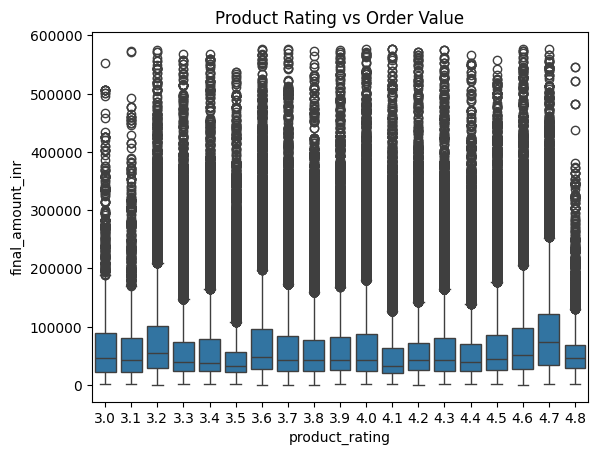

In [36]:
sns.boxplot(x='product_rating', y='final_amount_inr', data=df)
plt.title("Product Rating vs Order Value")


#Question 17
Create customer journey analysis showing purchase frequency patterns, category transitions, and customer evolution from first purchase to loyal customers using flow diagrams and transition matrices.


# Question 18
Analyze inventory and product lifecycle patterns. Study product launch success, decline phases, and category evolution over the decade with detailed trend analysis.


In [37]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'customer_rating', 'return_status', 'order_month', 'order_year',
       'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'payment_method_simplified'],
      dtype='object')

In [39]:
launch_date=df.groupby('product_id')['order_date'].min()
df['launch_date']=df['product_id'].map(launch_date)

df['launch_date'] = df.groupby('product_id')['launch_date'].transform(lambda x: x.fillna(x.min()))

df_cleaned = df.dropna(subset=['launch_date','order_date']).copy()
df_cleaned['week_since_launch']=((df_cleaned['order_date']-df_cleaned['launch_date']).dt.days//7).astype(int)

life_cycle=df_cleaned.groupby(['order_year','week_since_launch'])['final_amount_inr'].sum().reset_index()
life_cycle

,order_year,week_since_launch,final_amount_inr
0,2015,0,45200395.77
1,2015,1,35866720.01
2,2015,2,28016006.56
3,2015,3,27227170.08
4,2015,4,34164027.96
...,...,...,...
3444,2025,569,7708860.36
3445,2025,570,8621064.39
3446,2025,571,7294283.59
3447,2025,572,7342466.91


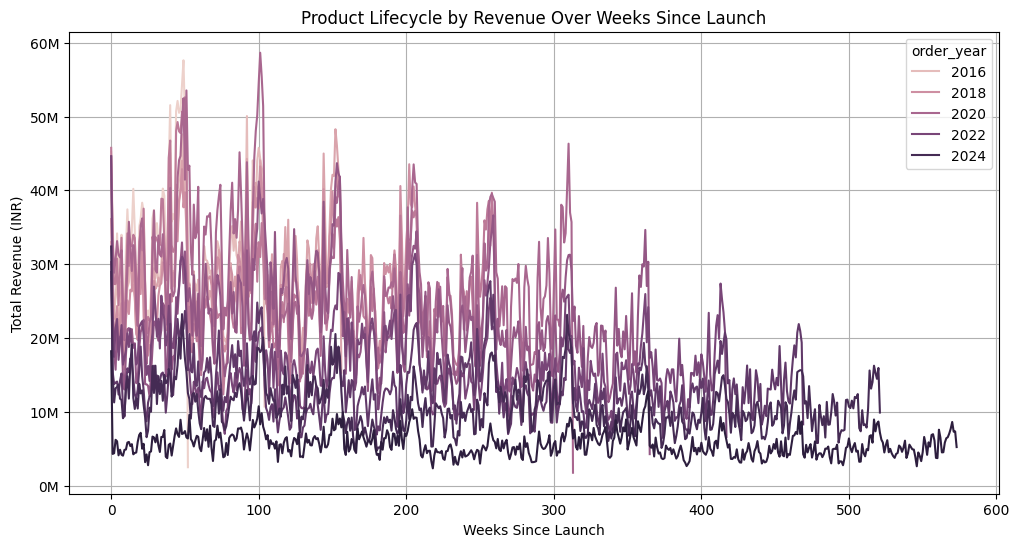

In [41]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))
sns.lineplot(data=life_cycle, x='week_since_launch', y='final_amount_inr', hue='order_year')
plt.title('Product Lifecycle by Revenue Over Weeks Since Launch')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Total Revenue (INR)')
plt.grid(True)

# Format y-axis labels to display in a more readable format (e.g., in millions or with currency symbols)
formatter = mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M') # Format in millions
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#Question 19
Build competitive pricing analysis comparing brand positioning, price ranges, and market penetration strategies across different product categories using box plots and competitive matrices.


# SQL Tables creation.

In [43]:
!pip3 install pymysql
import pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.3 MB/s eta 0:00:00
